In [172]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt


from IPython.display import Image
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pydotplus

from IPython.display import Image
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from random import seed
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  StandardScaler

from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import itertools
from sklearn.metrics import cohen_kappa_score, make_scorer
from pycaret.classification import *
from scipy.stats import chisquare
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


In [16]:
from google.colab import files

In [113]:
#pip install pycaret
#!pip install MICE
#!pip install mouse
#!pip install django-mptt==0.5.2
#!#pip install fancyimpute
#!pip install skmice

In [18]:
files.upload()

Saving export.csv to export.csv


{'export.csv': b'months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported\n328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y\n228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machi

EDA


In [19]:
insurance=pd.read_csv('export.csv')
insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [20]:
insurance.shape

(1000, 39)

In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [22]:
insurance.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [23]:
z=insurance.select_dtypes(include='object')

In [24]:
z.shape

(1000, 21)

In [28]:
insurance['incident_date']=pd.to_datetime(insurance['incident_date'])

In [29]:
insurance['policy_bind_date']=pd.to_datetime(insurance['policy_bind_date'])

In [30]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [31]:
insurance['accident_date_since_policy_bind_date']=insurance['policy_bind_date']-insurance['incident_date']

In [32]:
z1=pd.crosstab(insurance['accident_date_since_policy_bind_date'],insurance['fraud_reported'])
print(z1.head())
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z1)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant.

fraud_reported                        N  Y
accident_date_since_policy_bind_date      
-9172 days                            1  0
-9155 days                            1  0
-9133 days                            1  0
-9129 days                            1  0
-9124 days                            0  1
929.2080441168298
0.695412565067643
952
[[0.753 0.247]
 [0.753 0.247]
 [0.753 0.247]
 ...
 [0.753 0.247]
 [0.753 0.247]
 [0.753 0.247]]


In [33]:
insurance.drop(["policy_number","insured_zip","incident_location","policy_deductable","accident_date_since_policy_bind_date"],1,inplace=True)

In [34]:
insurance.nunique()


months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim        

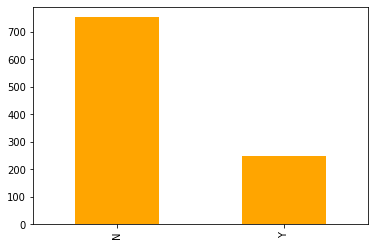

In [ ]:
insurance['fraud_reported'].value_counts().plot(kind='bar',color='orange')

In [ ]:
insurance['csl_per_person']=insurance.policy_csl.str.split('/',expand=True)[0]
insurance['csl_per_accident']=insurance.policy_csl.str.split('/',expand=True)[1]

In [ ]:
insurance.drop('policy_csl',1,inplace=True)

In [35]:
insurance['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [36]:
z2=pd.crosstab(insurance['incident_state'],insurance['fraud_reported'])
print(z2)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z2)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#significant

fraud_reported    N   Y
incident_state         
NC               76  34
NY              204  58
OH               13  10
PA               22   8
SC              175  73
VA               85  25
WV              178  39
16.129183580687762
0.01307712904936151
6
[[ 82.83   27.17 ]
 [197.286  64.714]
 [ 17.319   5.681]
 [ 22.59    7.41 ]
 [186.744  61.256]
 [ 82.83   27.17 ]
 [163.401  53.599]]


In [ ]:
#So South Carolina has maximum no of fraud cases along with New york.

In [37]:
z3=pd.crosstab(insurance['age'],insurance['fraud_reported'])
print(z3)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z3)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported   N   Y
age                   
19               0   1
20               1   0
21               6   0
22               0   1
23               3   4
24               8   2
25              10   4
26              18   8
27              21   3
28              23   7
29              25  10
30              36   6
31              28  14
32              27  11
33              27  12
34              31  13
35              27   5
36              28   4
37              31  10
38              31  11
39              38  10
40              34   4
41              29  16
42              23   9
43              38  11
44              24   8
45              21   5
46              26   7
47              17   7
48              19   6
49              14   0
50              10   3
51               5   4
52               2   2
53              12   1
54               7   3
55              10   4
56               5   3
57              12   4
58               4   4
59               4   1
60         

In [39]:
z4=pd.crosstab(insurance.policy_state,insurance.fraud_reported)
#do chi square test to check 
print(z4)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z4)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported    N   Y
policy_state           
IL              261  77
IN              231  79
OH              261  91
1.022879411786087
0.5996316638296726
2
[[254.514  83.486]
 [233.43   76.57 ]
 [265.056  86.944]]


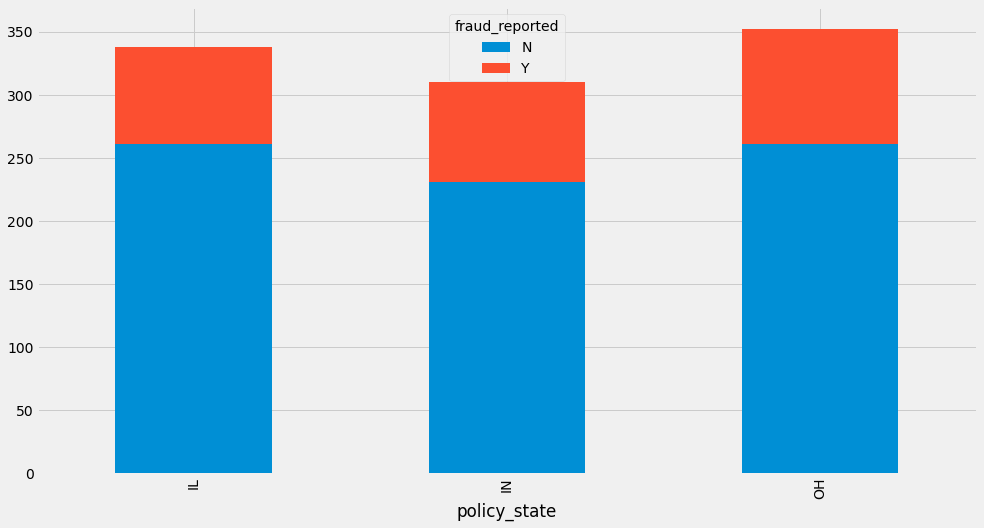

In [40]:
pd.crosstab(insurance.policy_state,insurance.fraud_reported).plot(kind="bar",stacked=True)

In [ ]:
z5=pd.crosstab(insurance.incident_state,insurance.fraud_reported)
print(z5)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z5)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#significant

fraud_reported    N   Y
incident_state         
NC               76  34
NY              204  58
OH               13  10
PA               22   8
SC              175  73
VA               85  25
WV              178  39
16.129183580687762
0.01307712904936151
6
[[ 82.83   27.17 ]
 [197.286  64.714]
 [ 17.319   5.681]
 [ 22.59    7.41 ]
 [186.744  61.256]
 [ 82.83   27.17 ]
 [163.401  53.599]]


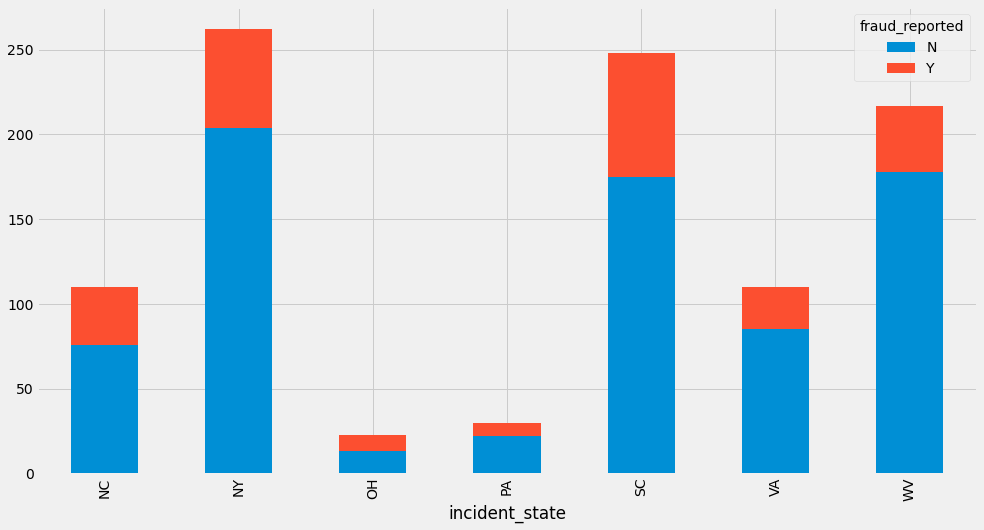

In [41]:
pd.crosstab(insurance.incident_state,insurance.fraud_reported).plot(kind="bar",stacked=True)

In [42]:
z6=pd.crosstab(insurance.insured_education_level,insurance.fraud_reported)
print(z6)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(z6)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#chi square test.
#not significant

fraud_reported             N   Y
insured_education_level         
Associate                111  34
College                   90  32
High School              124  36
JD                       119  42
MD                       106  38
Masters                  111  32
PhD                       92  33
1.6882273540205779
0.9460265140372582
6
[[109.185  35.815]
 [ 91.866  30.134]
 [120.48   39.52 ]
 [121.233  39.767]
 [108.432  35.568]
 [107.679  35.321]
 [ 94.125  30.875]]


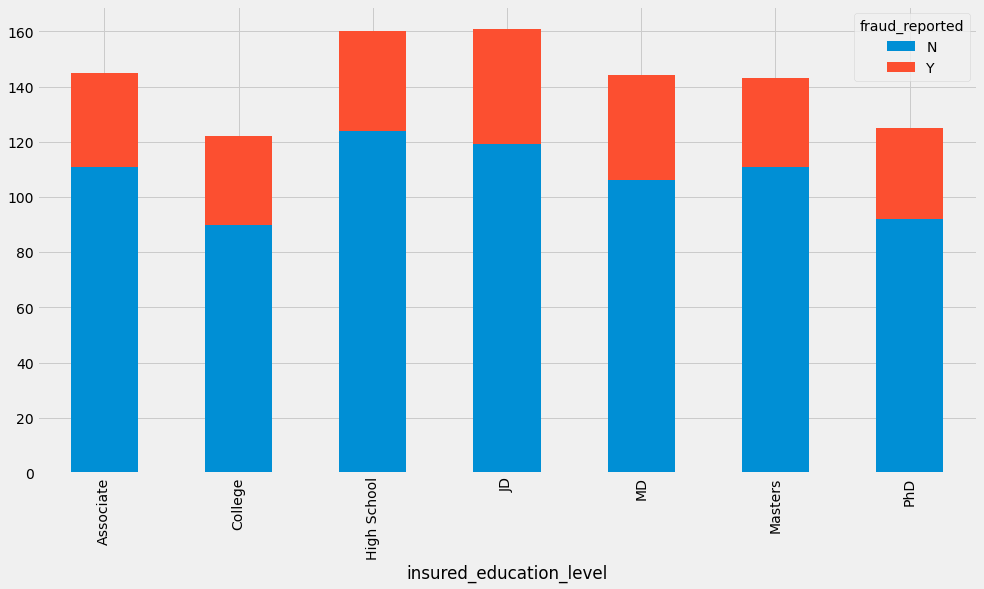

In [43]:
pd.crosstab(insurance.insured_education_level,insurance.fraud_reported).plot(kind="bar",stacked=True)
#chi square

In [44]:
z7=pd.crosstab(insurance.insured_hobbies,insurance.fraud_reported)
print(z7)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z7)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#chi square test.
#significant

fraud_reported    N   Y
insured_hobbies        
base-jumping     36  13
basketball       28   6
board-games      34  14
bungie-jumping   47   9
camping          50   5
chess             8  38
cross-fit         9  26
dancing          38   5
exercise         46  11
golf             49   6
hiking           40  12
kayaking         49   5
movies           46   9
paintball        44  13
polo             34  13
reading          47  17
skydiving        38  11
sleeping         33   8
video-games      40  10
yachting         37  16
162.31539899334604
8.989147139882094e-25
19
[[36.897 12.103]
 [25.602  8.398]
 [36.144 11.856]
 [42.168 13.832]
 [41.415 13.585]
 [34.638 11.362]
 [26.355  8.645]
 [32.379 10.621]
 [42.921 14.079]
 [41.415 13.585]
 [39.156 12.844]
 [40.662 13.338]
 [41.415 13.585]
 [42.921 14.079]
 [35.391 11.609]
 [48.192 15.808]
 [36.897 12.103]
 [30.873 10.127]
 [37.65  12.35 ]
 [39.909 13.091]]


In [ ]:
#People who play chess and cross fit are more likely to commit fraud

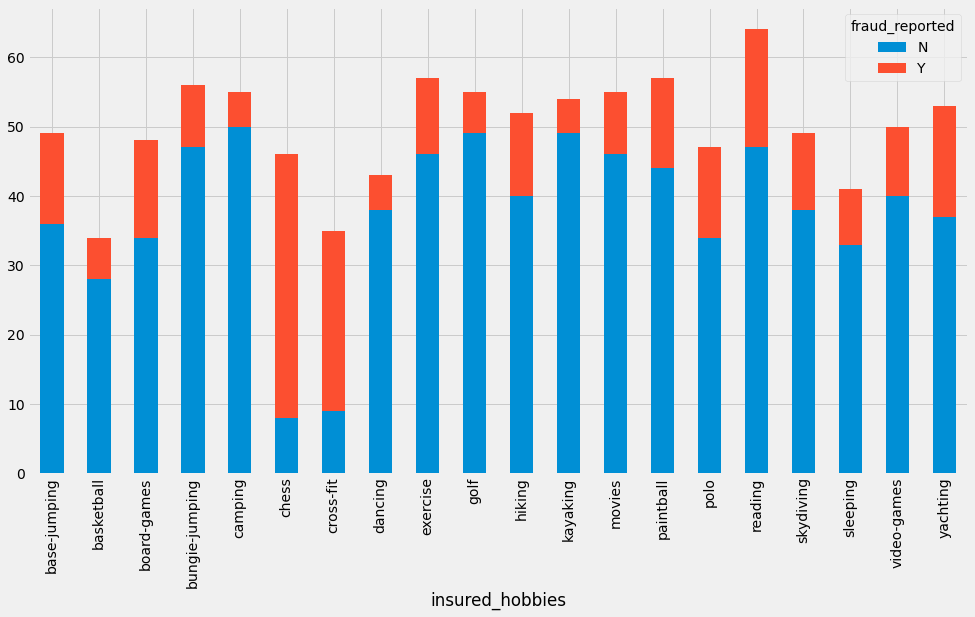

In [45]:
pd.crosstab(insurance.insured_hobbies,insurance.fraud_reported).plot(kind="bar",stacked=True)

In [46]:
pd.crosstab(insurance.insured_relationship,insurance.fraud_reported)

fraud_reported,N,Y
insured_relationship,,
husband,135,35
not-in-family,129,45
other-relative,125,52
own-child,144,39
unmarried,107,34
wife,113,42


In [47]:
z8=pd.crosstab(insurance.insured_relationship,insurance.fraud_reported)
print(z8)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z8)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#chi square test.
#not significant

fraud_reported          N   Y
insured_relationship         
husband               135  35
not-in-family         129  45
other-relative        125  52
own-child             144  39
unmarried             107  34
wife                  113  42
5.389248280971132
0.3702430738108002
5
[[128.01   41.99 ]
 [131.022  42.978]
 [133.281  43.719]
 [137.799  45.201]
 [106.173  34.827]
 [116.715  38.285]]


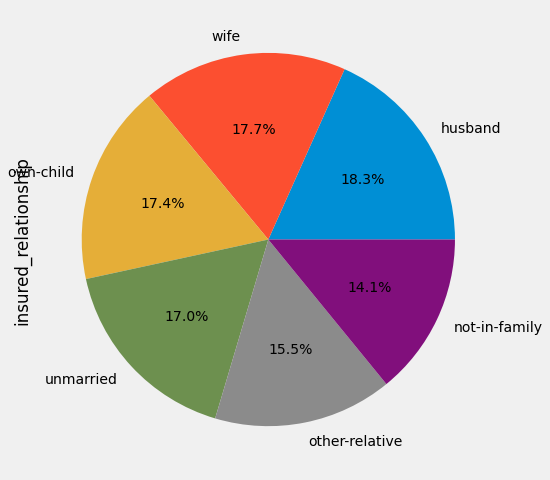

In [48]:
ax=(insurance['insured_relationship'].value_counts()*100/len(insurance)).plot.pie(autopct='%.1f%%',labels=['husband','wife','own-child','unmarried','other-relative','not-in-family'])

<Figure size 1080x1080 with 0 Axes>

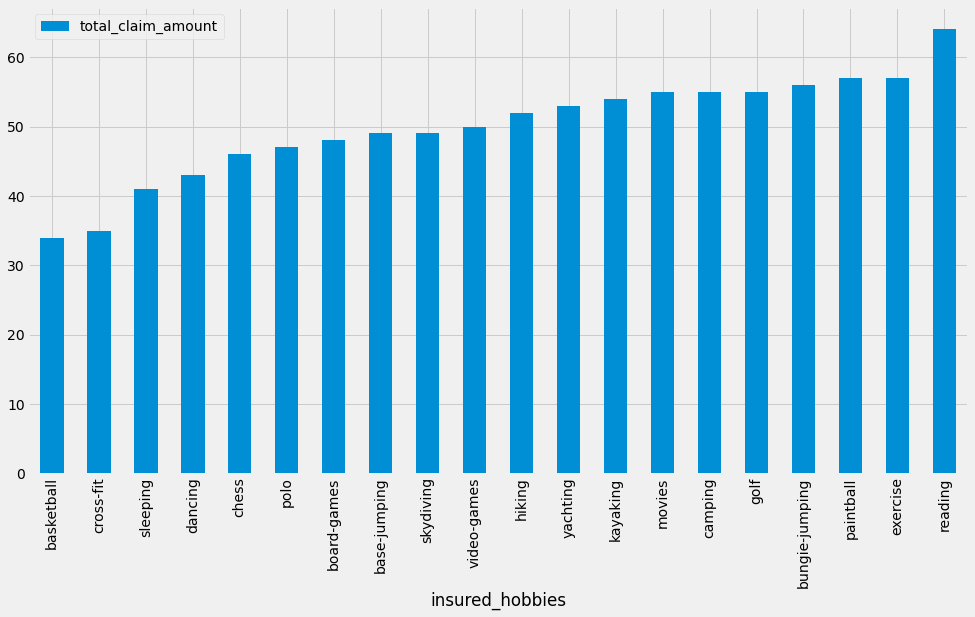

In [49]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,15))
ax=insurance.groupby('insured_hobbies').agg({'total_claim_amount':'count'}).sort_values(by='total_claim_amount',ascending=True)
ax.plot(kind='bar')

In [ ]:
#people with reading habit have claimed most no of times

In [50]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [51]:
z9=pd.crosstab(insurance.insured_occupation,insurance.fraud_reported)
print(z9)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z9)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#chi square test.
#not significant

fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales               55  21
tech-support        56  22
transport-moving    51  21
17.659340491516012
0.17088761164902544
13
[[48.945 16.055]
 [51.957 17.043]
 [55.722 18.278]
 [57.228 18.772]
 [39.909 13.091]
 [40.662 13.338]
 [70.029 22.971]
 [53.463 17.537]
 [53.463 17.537]
 [64.005 20.995]
 [47.439 15.561]
 [57.228 18.772]
 [58.734 19.266]
 [54.216 17.784]]


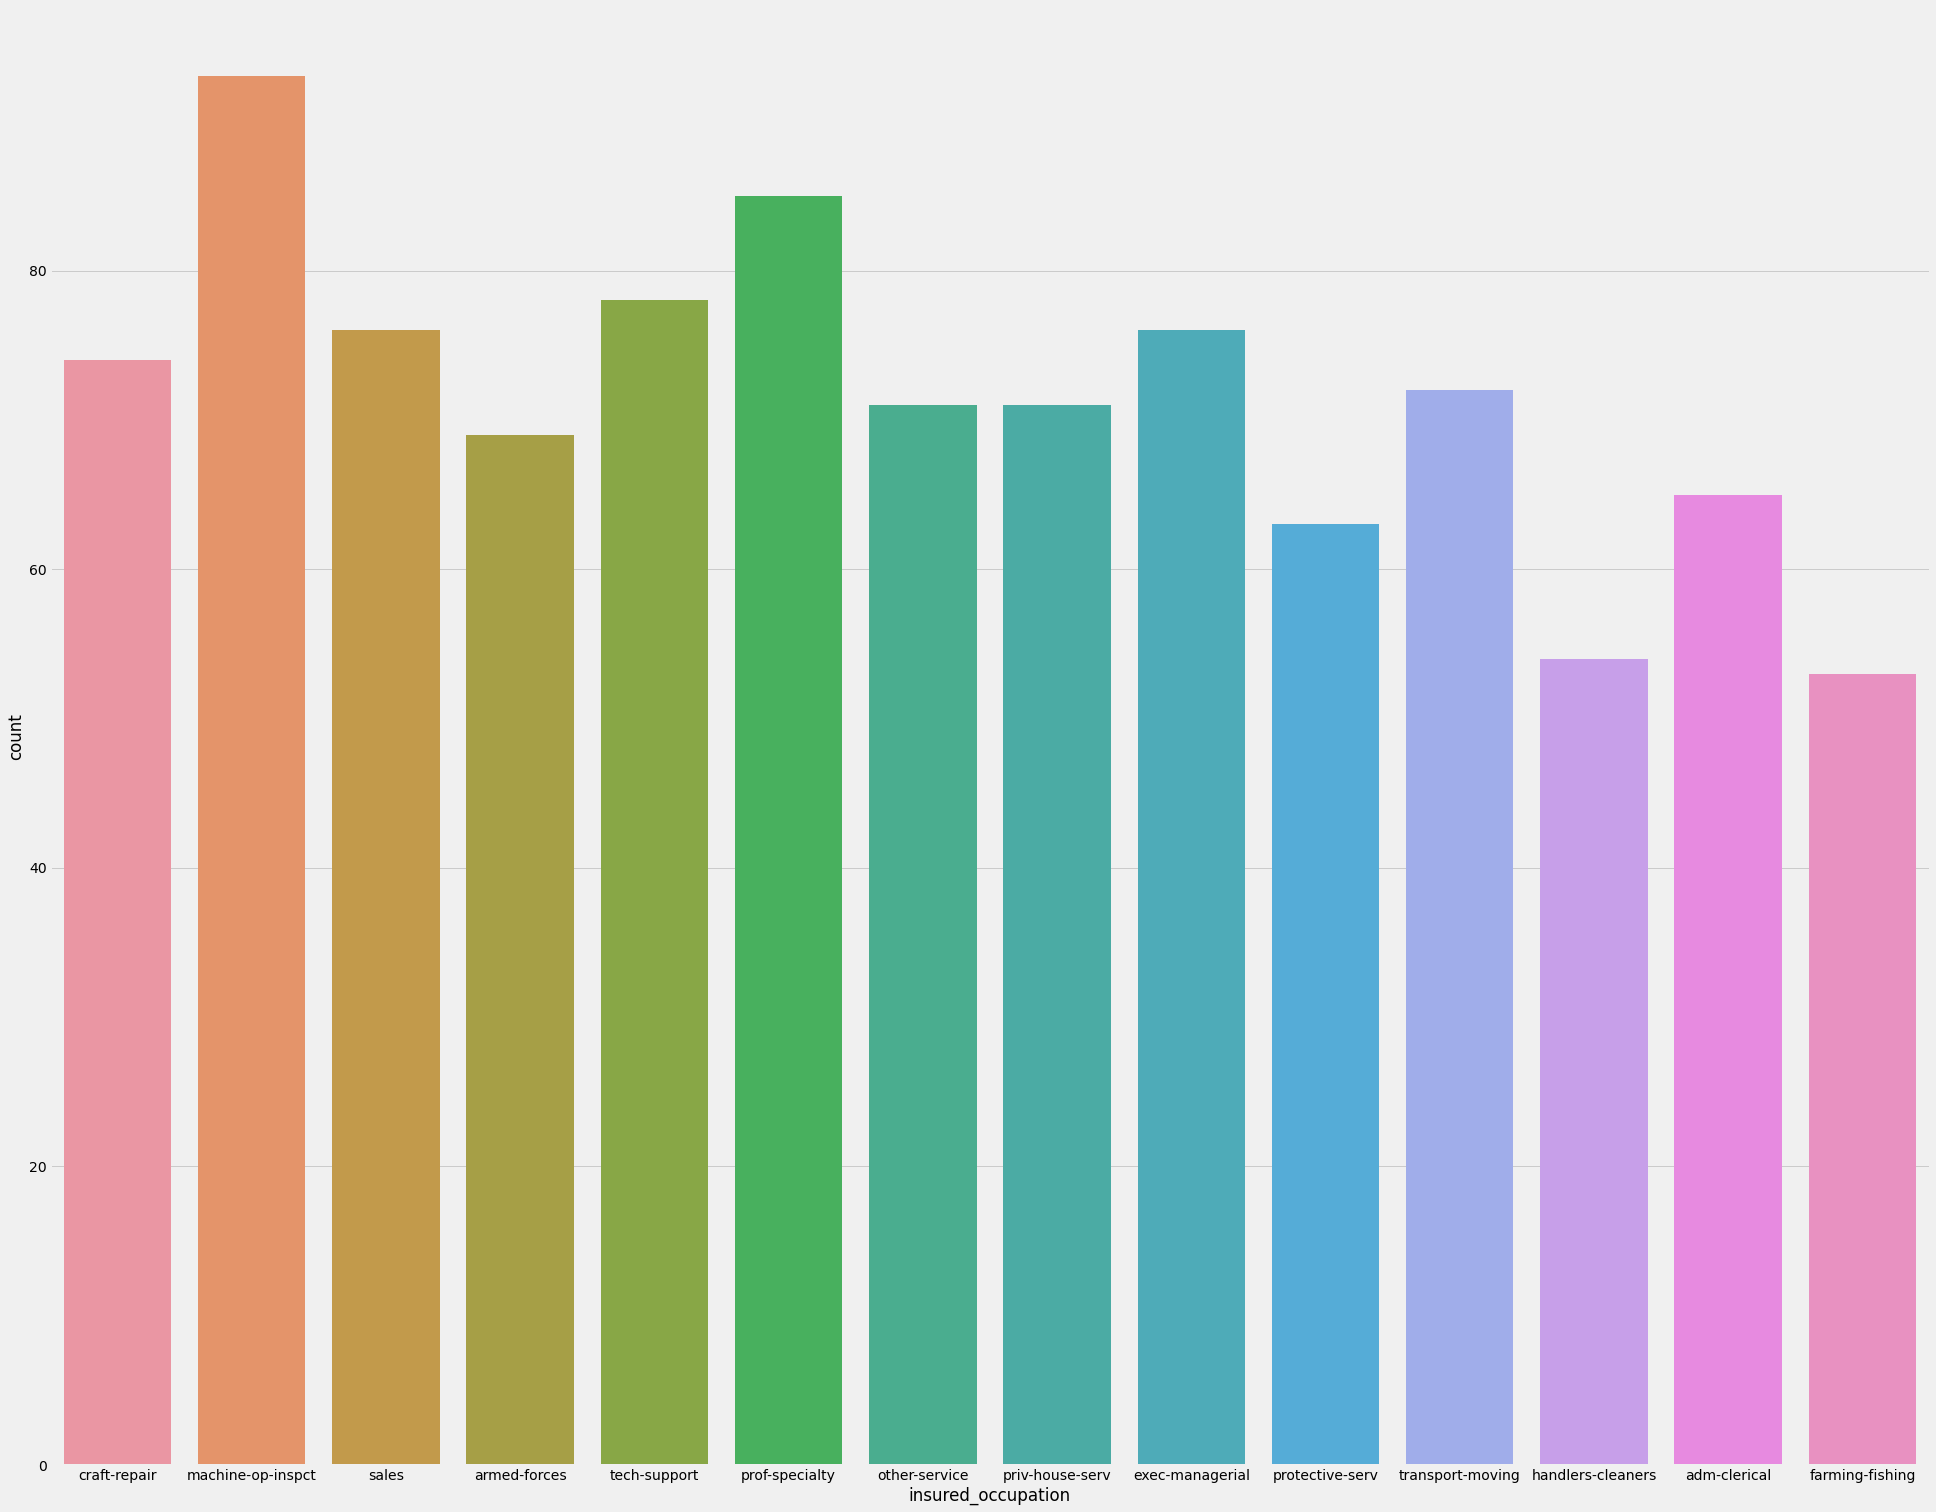

In [52]:
fig=plt.figure(figsize=(30,25))
sns.countplot(insurance['insured_occupation'])

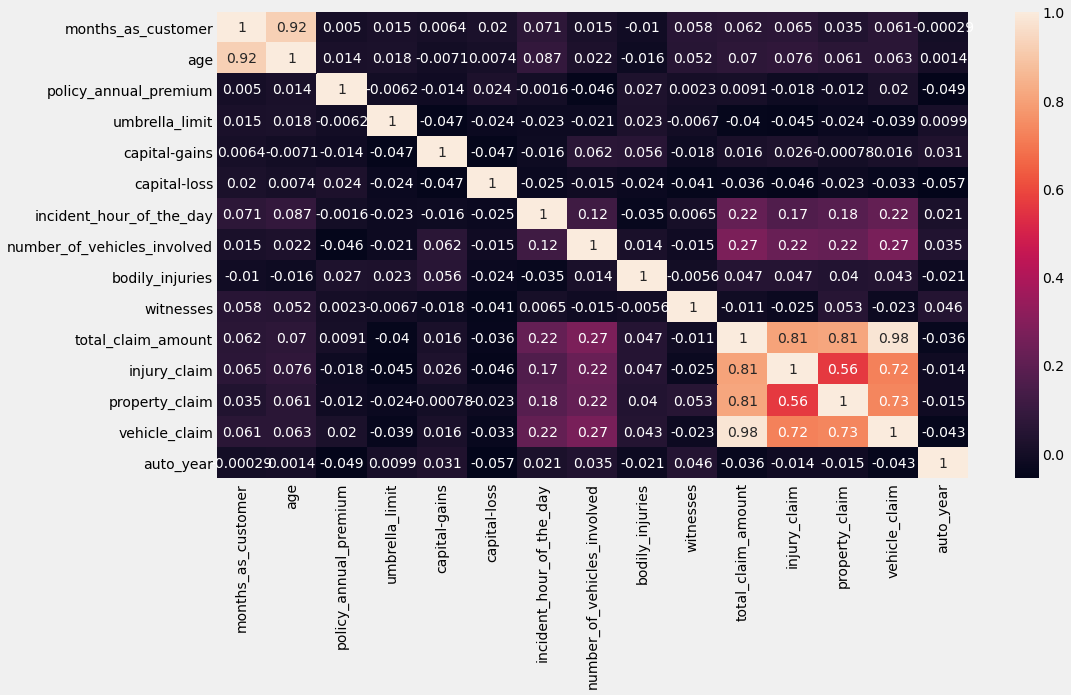

In [53]:
df=insurance.corr()
sns.heatmap(df,annot=True)

In [54]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [56]:
z10=pd.crosstab(insurance.incident_severity,insurance.fraud_reported)
print(z10)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z10)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#chi square test.

fraud_reported       N    Y
incident_severity          
Major Damage       109  167
Minor Damage       316   38
Total Loss         244   36
Trivial Damage      84    6
264.2373497806052
5.447033547673708e-57
3
[[207.828  68.172]
 [266.562  87.438]
 [210.84   69.16 ]
 [ 67.77   22.23 ]]


In [ ]:
#If the damage was major there was high chance that it will be fraudlent

In [57]:
z11=pd.crosstab(insurance.incident_type,insurance.fraud_reported)
print(z11)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z11)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#chi square test.
#chi square test
#significant

fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8
29.131539725752873
2.1013336774786627e-06
3
[[315.507 103.493]
 [ 63.252  20.748]
 [303.459  99.541]
 [ 70.782  23.218]]


In [58]:
#If there was a multi vehicle collision and single vehicle collision there is a high likely chance it is going to be fraud.

In [59]:
z12=pd.crosstab(insurance.collision_type,insurance.fraud_reported)
print(z12)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z12)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#significant

fraud_reported     N   Y
collision_type          
?                162  16
Front Collision  184  70
Rear Collision   201  91
Side Collision   206  70
31.365781459155905
7.118897790511356e-07
3
[[134.034  43.966]
 [191.262  62.738]
 [219.876  72.124]
 [207.828  68.172]]


In [60]:
#If there was a rear collision,there was a high chance that it will be fraudlent

In [61]:
z13=pd.crosstab(insurance.authorities_contacted,insurance.fraud_reported)
print(z13)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z13)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#significant

fraud_reported           N   Y
authorities_contacted         
Ambulance              139  57
Fire                   163  60
None                    85   6
Other                  135  63
Police                 231  61
26.31975738655569
2.727701445143596e-05
4
[[147.588  48.412]
 [167.919  55.081]
 [ 68.523  22.477]
 [149.094  48.906]
 [219.876  72.124]]


In [62]:
#In all of the fraudlent cases ,there were only six cases where none of the authorities were contacted.

In [63]:
z14=pd.crosstab(insurance.incident_city,insurance.fraud_reported)
print(z14)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z14)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#Not Significant

fraud_reported    N   Y
incident_city          
Arlington       108  44
Columbus        110  39
Hillsdale       106  35
Northbend       111  34
Northbrook       95  27
Riverwood       104  30
Springfield     119  38
2.6105178630461676
0.8558997033560567
6
[[114.456  37.544]
 [112.197  36.803]
 [106.173  34.827]
 [109.185  35.815]
 [ 91.866  30.134]
 [100.902  33.098]
 [118.221  38.779]]


In [64]:
#almost all cities have equal amount of contribution to fraudlent claims

In [65]:
bins=[-1,3,6,9,12,17,20,24]
names=['past_midnight','early_morning','morning','fore-noon','afternoon','evening','night']
insurance['incident_period_of_the_day']=pd.cut(insurance.incident_hour_of_the_day,bins,labels=names).astype(object)
insurance['incident_period_of_the_day']


0      early_morning
1            morning
2            morning
3      early_morning
4            evening
           ...      
995          evening
996            night
997    early_morning
998    past_midnight
999    early_morning
Name: incident_period_of_the_day, Length: 1000, dtype: object

In [66]:
z15=pd.crosstab(insurance.incident_period_of_the_day,insurance.fraud_reported)
print(z15)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z15)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported                N   Y
incident_period_of_the_day         
afternoon                   171  60
early_morning                92  31
evening                      83  32
fore-noon                    81  35
morning                     101  18
night                       102  29
past_midnight               123  42
9.067975670616676
0.169791104706709
6
[[173.943  57.057]
 [ 92.619  30.381]
 [ 86.595  28.405]
 [ 87.348  28.652]
 [ 89.607  29.393]
 [ 98.643  32.357]
 [124.245  40.755]]


In [67]:
insurance.drop('incident_period_of_the_day',1,inplace=True)

In [ ]:
#the highest amount of fraudlent cases was reported between 12:00 pm to 5:00

In [68]:
insurance['vehicle_age']=2018-insurance['auto_year']

In [69]:
insurance['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [70]:
z16=pd.crosstab(insurance.vehicle_age,insurance.fraud_reported)
print(z16)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z16)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported   N   Y
vehicle_age           
3               36  11
4               32  12
5               34  15
6               37   9
7               36  17
8               43   7
9               39  11
10              35  10
11              34  18
12              39  14
13              42  12
14              23  16
15              42   9
16              39  10
17              33   9
18              31  11
19              45  10
20              33   7
21              34  12
22              23  14
23              43  13
23.40410132129537
0.2693905487970402
20
[[35.391 11.609]
 [33.132 10.868]
 [36.897 12.103]
 [34.638 11.362]
 [39.909 13.091]
 [37.65  12.35 ]
 [37.65  12.35 ]
 [33.885 11.115]
 [39.156 12.844]
 [39.909 13.091]
 [40.662 13.338]
 [29.367  9.633]
 [38.403 12.597]
 [36.897 12.103]
 [31.626 10.374]
 [31.626 10.374]
 [41.415 13.585]
 [30.12   9.88 ]
 [34.638 11.362]
 [27.861  9.139]
 [42.168 13.832]]


In [71]:
insurance.groupby('vehicle_age').agg({'fraud_reported':'count'})

,fraud_reported
vehicle_age,
3,47
4,44
5,49
6,46
7,53
8,50
9,50
10,45
11,52


In [72]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [74]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [75]:
insurance.shape

(1000, 36)

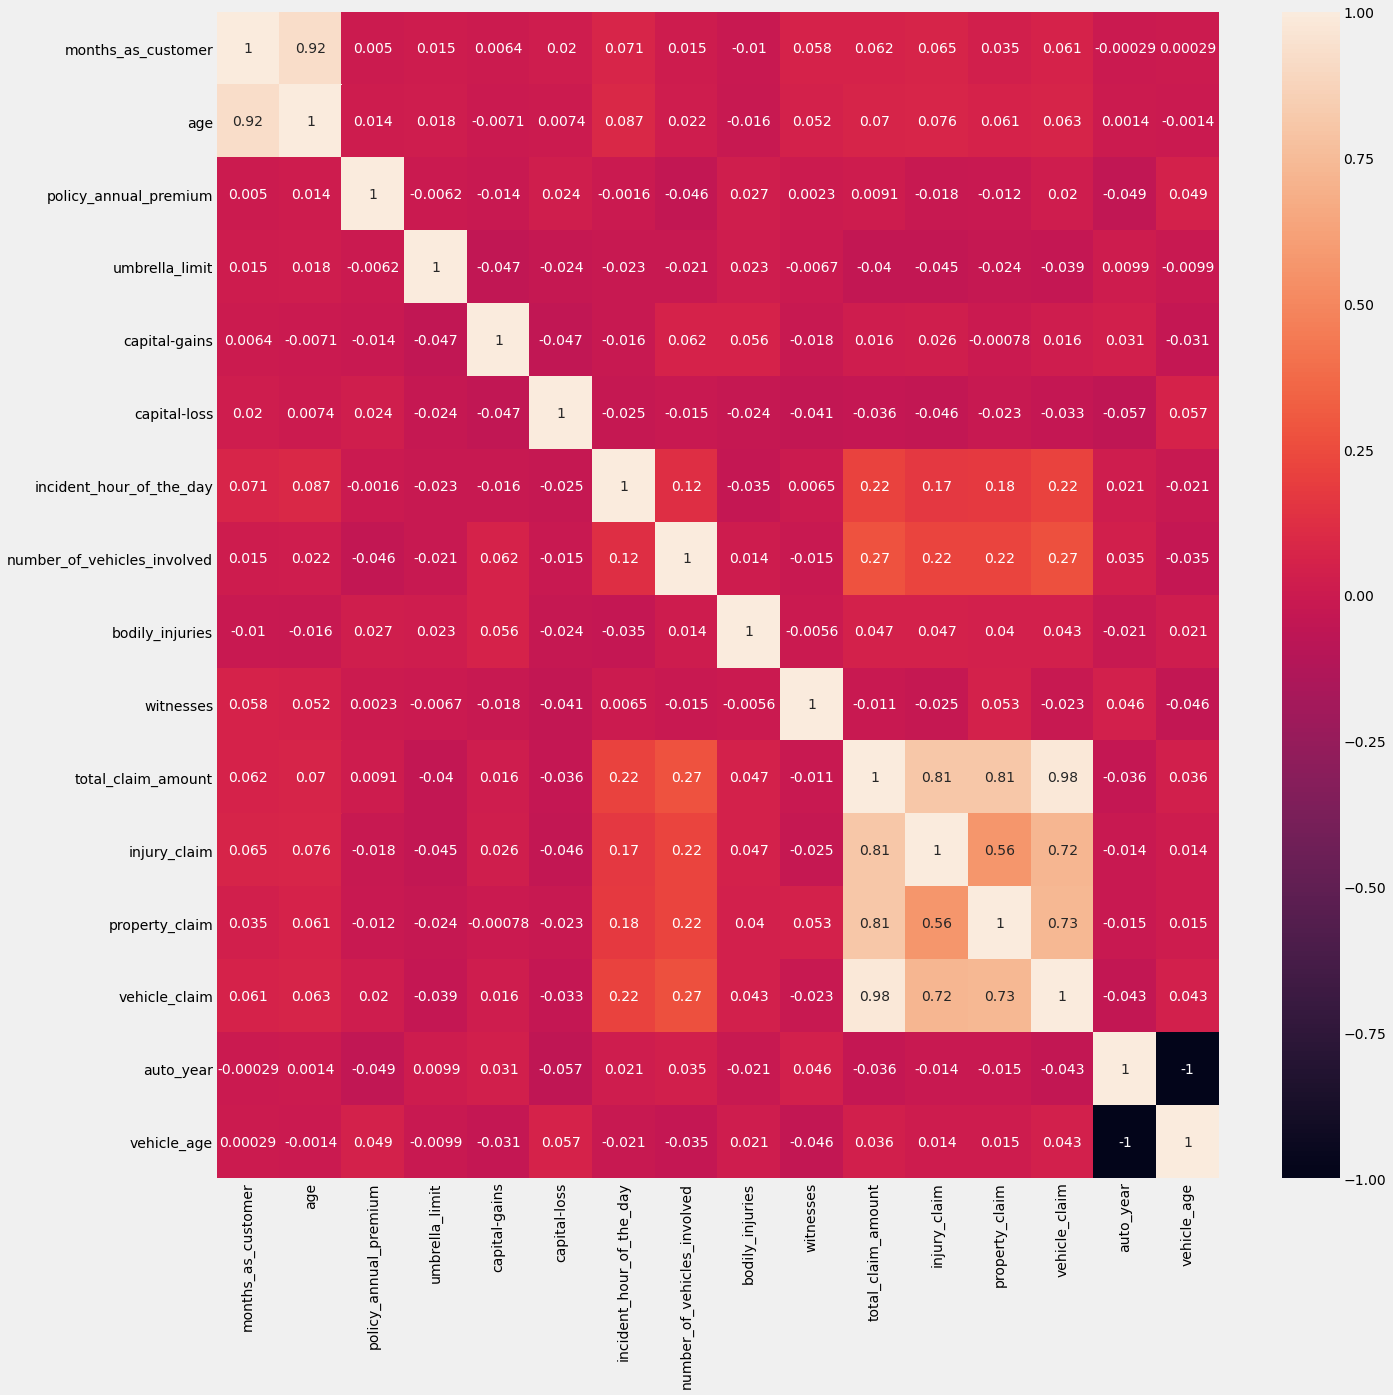

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(insurance.corr(),annot=True)

In [77]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [78]:
insurance.auto_model.nunique()

39

In [79]:
z17=pd.crosstab(insurance.auto_make,insurance.fraud_reported)
print(z17)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z17)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported   N   Y
auto_make             
Accura          55  13
Audi            48  21
BMW             52  20
Chevrolet       55  21
Dodge           60  20
Ford            50  22
Honda           41  14
Jeep            56  11
Mercedes        43  22
Nissan          64  14
Saab            62  18
Suburu          61  19
Toyota          57  13
Volkswagen      49  19
13.775924306876272
0.3898117167099123
13
[[51.204 16.796]
 [51.957 17.043]
 [54.216 17.784]
 [57.228 18.772]
 [60.24  19.76 ]
 [54.216 17.784]
 [41.415 13.585]
 [50.451 16.549]
 [48.945 16.055]
 [58.734 19.266]
 [60.24  19.76 ]
 [60.24  19.76 ]
 [52.71  17.29 ]
 [51.204 16.796]]


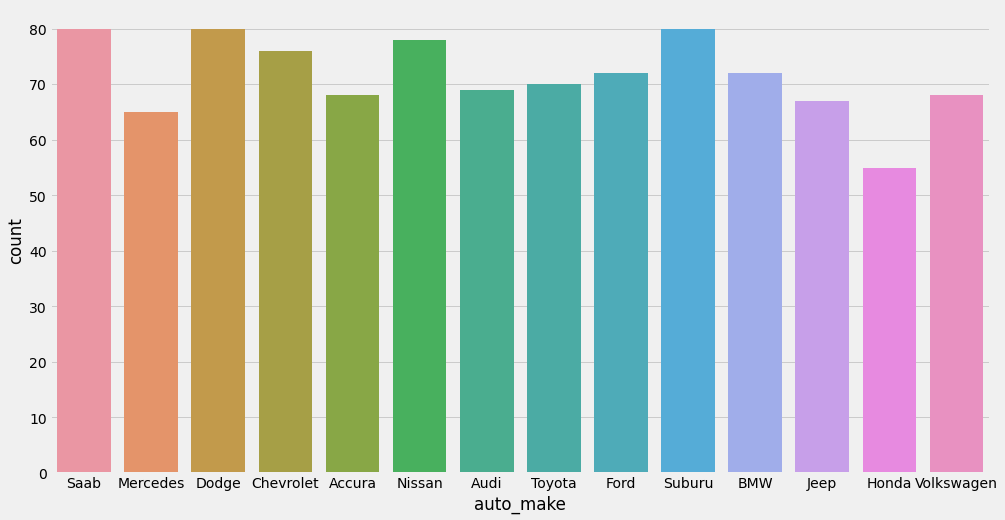

In [80]:
sns.countplot(insurance.auto_make)

In [81]:
insurance['day_of_the_accident']=insurance.incident_date.dt.weekday

In [82]:
z18=pd.crosstab(insurance.day_of_the_accident,insurance.fraud_reported)
print(z18)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z18)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported         N   Y
day_of_the_accident         
0                     96  40
1                    109  26
2                    113  32
3                    109  35
4                    108  34
5                    119  47
6                     99  33
5.538981379783
0.4767578526080444
6
[[102.408  33.592]
 [101.655  33.345]
 [109.185  35.815]
 [108.432  35.568]
 [106.926  35.074]
 [124.998  41.002]
 [ 99.396  32.604]]


In [ ]:
#Dropping the rows which are not required.

In [ ]:
insurance.drop(['auto_year','policy_bind_date','incident_hour_of_the_day','incident_date','injury_claim','property_claim','vehicle_claim'],1,inplace=True)

In [ ]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_model', 'fraud_reported',
       'csl_per_person', 'csl_per_accident', 'incident_period_of_the_day',
       'vehicle_age', 'day_of_the_accident'],
      dtype='object')

In [83]:
insurance.shape

(1000, 37)

In [84]:
insurance.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [85]:
unknowns={}
for i in list(insurance.columns):
  if(insurance[i]).dtype==object:
    j=np.sum(insurance[i]=='?')
    unknowns[i]=j
unknowns=pd.DataFrame.from_dict(unknowns,orient='index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [86]:
insurance.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [87]:
pd.crosstab(insurance.collision_type,insurance.fraud_reported)

fraud_reported,N,Y
collision_type,,
?,162,16
Front Collision,184,70
Rear Collision,201,91
Side Collision,206,70


In [88]:
insurance.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [89]:
z19=pd.crosstab(insurance.property_damage,insurance.fraud_reported)
print(z19)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z19)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #significant

fraud_reported     N    Y
property_damage          
?                257  103
NO               272   66
YES              224   78
8.031107812635538
0.01803296321162173
2
[[271.08   88.92 ]
 [254.514  83.486]
 [227.406  74.594]]


In [90]:
insurance.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [91]:
z20=pd.crosstab(insurance.police_report_available,insurance.fraud_reported)
print(z20)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z20)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported             N   Y
police_report_available         
?                        254  89
NO                       257  86
YES                      242  72
0.8416042524220428
0.6565199966565936
2
[[258.279  84.721]
 [258.279  84.721]
 [236.442  77.558]]


In [92]:
z21=pd.crosstab(insurance['number_of_vehicles_involved'],insurance['fraud_reported'])
print(z21)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z21)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported                 N    Y
number_of_vehicles_involved          
1                            448  133
2                             21    9
3                            264   94
4                             20   11
3.8796134479183912
0.2747605704714074
3
[[437.493 143.507]
 [ 22.59    7.41 ]
 [269.574  88.426]
 [ 23.343   7.657]]


In [ ]:
insurance.columns.tolist()

['months_as_customer',
 'age',
 'policy_bind_date',
 'policy_state',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 'incident_period_of_the_day',
 'vehicle_age',
 'day_of_the_accident',
 'csl_per_person',
 'csl_per_accident']

In [93]:
z22=insurance.groupby('fraud_reported').agg({'total_claim_amount':[np.sum,np.mean]})
print(z22)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z22)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #significant
 #Average claim amount was 10000$ higher for fraudlent claims.

               total_claim_amount              
                              sum          mean
fraud_reported                                 
N                        37867320  50288.605578
Y                        14894620  60302.105263
37623.20623404023
0.0
1
[[3.78382983e+07 7.93102814e+04]
 [1.49236417e+07 3.12804294e+04]]


In [94]:
z23=pd.crosstab(insurance['insured_sex'],insurance['fraud_reported'])
print(z23)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z23)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported    N    Y
insured_sex             
FEMALE          411  126
MALE            342  121
0.8149820820596481
0.36665138406877407
1
[[404.361 132.639]
 [348.639 114.361]]


In [95]:
z24=pd.crosstab(insurance['months_as_customer'],insurance['fraud_reported'])
print(z24)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z24)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported      N  Y
months_as_customer      
0                   1  0
1                   3  0
2                   2  0
3                   1  1
4                   2  1
...                .. ..
473                 0  1
475                 2  0
476                 1  0
478                 1  1
479                 2  0

[391 rows x 2 columns]
419.68518189948253
0.1443914857895284
390
[[0.753 0.247]
 [2.259 0.741]
 [1.506 0.494]
 [1.506 0.494]
 [2.259 0.741]
 [1.506 0.494]
 [0.753 0.247]
 [0.753 0.247]
 [2.259 0.741]
 [1.506 0.494]
 [1.506 0.494]
 [1.506 0.494]
 [0.753 0.247]
 [0.753 0.247]
 [0.753 0.247]
 [1.506 0.494]
 [1.506 0.494]
 [0.753 0.247]
 [1.506 0.494]
 [2.259 0.741]
 [3.012 0.988]
 [0.753 0.247]
 [0.753 0.247]
 [1.506 0.494]
 [3.765 1.235]
 [1.506 0.494]
 [1.506 0.494]
 [1.506 0.494]
 [3.012 0.988]
 [1.506 0.494]
 [1.506 0.494]
 [1.506 0.494]
 [0.753 0.247]
 [2.259 0.741]
 [1.506 0.494]
 [1.506 0.494]
 [0.753 0.247]
 [3.012 0.988]
 [1.506 0.494]
 [2.259 0.741]
 [1.506 0

In [99]:
insurance['csl_per_person']=insurance.policy_csl.str.split('/',expand=True)[0]
insurance['csl_per_accident']=insurance.policy_csl.str.split('/',expand=True)[1]

In [100]:
insurance.drop('policy_csl',1,inplace=True)

In [101]:
z25=pd.crosstab(insurance.policy_annual_premium,insurance.fraud_reported)
print(z25)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z25)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
#not significant

fraud_reported         N  Y
policy_annual_premium      
433.33                 1  0
484.67                 0  1
538.17                 1  0
566.11                 1  0
617.11                 0  1
...                   .. ..
1922.84                1  0
1927.87                0  1
1935.85                0  1
1969.63                1  0
2047.59                1  0

[991 rows x 2 columns]
991.9350936335627
0.47669899648026187
990
[[0.753 0.247]
 [0.753 0.247]
 [0.753 0.247]
 ...
 [0.753 0.247]
 [0.753 0.247]
 [0.753 0.247]]


In [102]:
z26=pd.crosstab(insurance.csl_per_accident,insurance.fraud_reported)
print(z26)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z26)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported      N   Y
csl_per_accident         
1000              235  65
300               259  90
500               259  92
2.1369985737735036
0.3435236612436183
2
[[225.9    74.1  ]
 [262.797  86.203]
 [264.303  86.697]]


In [ ]:
z27=pd.crosstab(insurance.csl_per_person,insurance.fraud_reported)
print(z27)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z27)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported    N   Y
csl_per_person         
100.0           259  90
250.0           259  92
500.0           235  65
2.1369985737735036
0.3435236612436183
2
[[262.797  86.203]
 [264.303  86.697]
 [225.9    74.1  ]]


In [103]:
insurance['csl_per_person']=insurance['csl_per_person'].astype('float64')
insurance['csl_per_accident']=insurance['csl_per_accident'].astype('float64')

In [ ]:
insurance.select_dtypes(include='object').columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [ ]:
insurance.drop('day_of_the_accident',1,inplace=True)

Missing value imputation


In [152]:
missing_df=insurance.copy()
missing_df_copy=insurance.copy()
missing_df.to_excel('missing.xlsx')

In [116]:
dummy_df=pd.get_dummies(missing_df_copy)

In [125]:
dummy_df.columns.tolist()

['months_as_customer',
 'age',
 'policy_bind_date',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'vehicle_age',
 'day_of_the_accident',
 'csl_per_person',
 'csl_per_accident',
 'policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'insured_sex_FEMALE',
 'insured_sex_MALE',
 'insured_education_level_Associate',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured

In [141]:
missing_df.replace('?',np.nan,inplace=True)

In [127]:
z31=pd.crosstab(dummy_df['police_report_available_?'],dummy_df[ 'fraud_reported_Y'])
print(z31)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z31)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported_Y             0    1
police_report_available_?          
0                          499  158
1                          254   89
0.3407237169244882
0.5594117764103813
1
[[494.721 162.279]
 [258.279  84.721]]


In [128]:
z32=pd.crosstab(dummy_df['collision_type_?'],dummy_df[ 'fraud_reported_Y'])
print(z32)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z32)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 # significant

fraud_reported_Y    0    1
collision_type_?          
0                 591  231
1                 162   16
27.720884422503666
1.401415791545433e-07
1
[[618.966 203.034]
 [134.034  43.966]]


In [129]:
z33=pd.crosstab(dummy_df['property_damage_?'],dummy_df[ 'fraud_reported_Y'])
print(z33)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(z33)
print(chi2_stat)
print(p_val)
print(dof)
print(ex)
 #not significant

fraud_reported_Y     0    1
property_damage_?          
0                  496  144
1                  257  103
4.303532981583935
0.03803328490000247
1
[[481.92 158.08]
 [271.08  88.92]]


In [132]:
missing_df.drop('fraud_reported',1,inplace=True)

In [137]:
missing_df.info()
missing_df.drop(['policy_bind_date','incident_date'],1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_annual_premium        1000 non-null   float64       
 5   umbrella_limit               1000 non-null   int64         
 6   insured_sex                  1000 non-null   object        
 7   insured_education_level      1000 non-null   object        
 8   insured_occupation           1000 non-null   object        
 9   insured_hobbies              1000 non-null   object        
 10  insured_relationship         1000 non-null   object        
 11  capital-gains                1000 non-null  

In [142]:
missing_df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make           

In [146]:
missing_df_dummy=pd.get_dummies(missing_df)
missing_df_dummy.columns.tolist()

['months_as_customer',
 'age',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'vehicle_age',
 'day_of_the_accident',
 'csl_per_person',
 'csl_per_accident',
 'policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'insured_sex_FEMALE',
 'insured_sex_MALE',
 'insured_education_level_Associate',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insur

In [153]:
# Categorical boolean mask
categorical_feature_mask = missing_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = missing_df.columns[categorical_feature_mask].tolist()

In [154]:
le = LabelEncoder()

In [155]:
missing_df[categorical_cols] = missing_df[categorical_cols].apply(lambda col: le.fit_transform(col))
missing_df[categorical_cols].head(10)

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,4,2,17,0,2,3,0,4,4,1,2,2,10,1,1
1,1,1,4,6,15,2,3,0,1,4,5,5,0,0,8,12,1
2,2,0,6,11,2,3,0,2,1,4,1,1,1,1,4,30,0
3,0,0,6,1,2,4,2,1,0,4,2,0,0,1,3,34,1
4,0,1,0,11,2,4,3,0,1,2,1,0,1,1,0,31,0
5,2,0,6,12,3,4,0,2,0,1,4,0,1,1,10,3,1
6,1,1,6,9,2,0,0,1,1,4,1,6,0,0,9,29,0
7,0,1,0,12,0,4,0,1,2,4,5,1,0,2,1,5,0
8,0,0,6,7,9,3,2,1,2,4,6,0,1,2,12,9,0
9,0,1,6,8,4,5,2,2,2,3,0,2,1,0,10,1,0


In [161]:
missing_df.drop(['policy_bind_date','incident_date','fraud_reported','day_of_the_accident'],1,inplace=True)

In [162]:
insurance[['police_report_available','property_damage','collision_type']]

,police_report_available,property_damage,collision_type
0,YES,YES,Side Collision
1,?,?,?
2,NO,NO,Rear Collision
3,NO,?,Front Collision
4,NO,NO,?
...,...,...,...
995,?,YES,Front Collision
996,?,YES,Rear Collision
997,YES,?,Side Collision
998,YES,?,Rear Collision


In [163]:
missing_df['collision_type'].replace(0,np.nan,inplace=True)
missing_df['police_report_available'].replace(0,np.nan,inplace=True)
missing_df['property_damage'].replace(0,np.nan,inplace=True)



In [164]:
missing_df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make           

In [168]:
impute=IterativeImputer(estimator=RandomForestRegressor(),max_iter=20,initial_strategy='mean')
miss_impute=impute.fit_transform(missing_df)

In [177]:
miss_impute=pd.DataFrame(miss_impute,columns=missing_df.columns)

In [175]:
impute1=IterativeImputer(estimator=LinearRegression(),max_iter=20,initial_strategy='mean')
miss_impute1=impute1.fit_transform(missing_df)
pd.DataFrame(miss_impute1,columns=missing_df.columns)

,months_as_customer,age,policy_state,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,vehicle_age,csl_per_person,csl_per_accident
0,328.0,48.0,2.0,1406.91,0.0,1.0,4.0,2.0,17.0,0.0,53300.0,0.0,2.0,3.000000,0.0,4.0,4.0,1.0,5.0,1.0,2.000000,1.0,2.0,2.000000,71610.0,6510.0,13020.0,52080.0,10.0,1.0,2004.0,14.0,250.0,500.0
1,228.0,42.0,1.0,1197.22,5000000.0,1.0,4.0,6.0,15.0,2.0,0.0,0.0,3.0,2.259112,1.0,4.0,5.0,5.0,8.0,1.0,1.367128,0.0,0.0,1.452382,5070.0,780.0,780.0,3510.0,8.0,12.0,2007.0,11.0,250.0,500.0
2,134.0,29.0,2.0,1413.14,5000000.0,0.0,6.0,11.0,2.0,3.0,35100.0,0.0,0.0,2.000000,1.0,4.0,1.0,1.0,7.0,3.0,1.000000,2.0,3.0,1.000000,34650.0,7700.0,3850.0,23100.0,4.0,30.0,2007.0,11.0,100.0,300.0
3,256.0,41.0,0.0,1415.74,6000000.0,0.0,6.0,1.0,2.0,4.0,48900.0,-62400.0,2.0,1.000000,0.0,4.0,2.0,0.0,5.0,1.0,1.352117,1.0,2.0,1.000000,63400.0,6340.0,6340.0,50720.0,3.0,34.0,2014.0,4.0,250.0,500.0
4,228.0,44.0,0.0,1583.91,6000000.0,1.0,0.0,11.0,2.0,4.0,66000.0,-46000.0,3.0,2.043272,1.0,2.0,1.0,0.0,20.0,1.0,1.000000,0.0,1.0,1.000000,6500.0,1300.0,650.0,4550.0,0.0,31.0,2009.0,9.0,500.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,38.0,2.0,1310.80,0.0,0.0,5.0,2.0,13.0,4.0,0.0,0.0,2.0,1.000000,1.0,1.0,0.0,4.0,20.0,1.0,2.000000,0.0,1.0,1.656807,87200.0,17440.0,8720.0,61040.0,6.0,6.0,2006.0,12.0,500.0,1000.0
996,285.0,41.0,0.0,1436.79,0.0,0.0,6.0,9.0,17.0,5.0,70900.0,0.0,2.0,2.000000,0.0,1.0,4.0,3.0,23.0,1.0,2.000000,2.0,3.0,1.649120,108480.0,18080.0,18080.0,72320.0,13.0,28.0,2015.0,3.0,100.0,300.0
997,130.0,34.0,2.0,1383.49,3000000.0,0.0,5.0,1.0,3.0,2.0,35100.0,0.0,0.0,3.000000,1.0,4.0,0.0,0.0,4.0,3.0,1.496593,2.0,3.0,2.000000,67500.0,7500.0,7500.0,52500.0,11.0,19.0,1996.0,22.0,250.0,500.0
998,458.0,62.0,0.0,1356.92,5000000.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,2.0,2.000000,0.0,3.0,1.0,0.0,2.0,1.0,1.584123,0.0,1.0,2.000000,46980.0,5220.0,5220.0,36540.0,1.0,5.0,1998.0,20.0,500.0,1000.0


In [191]:
miss_impute[['collision_type','property_damage','police_report_available']].mode()

,collision_type,property_damage,police_report_available
0,2.0,1.0,1.0


In [183]:
print(insurance[['collision_type','property_damage','police_report_available']])
print(miss_impute[['collision_type','property_damage','police_report_available']])
#2 rear collision
#1 no property damage
#1 no

      collision_type property_damage police_report_available
0     Side Collision             YES                     YES
1                  ?               ?                       ?
2     Rear Collision              NO                      NO
3    Front Collision               ?                      NO
4                  ?              NO                      NO
..               ...             ...                     ...
995  Front Collision             YES                       ?
996   Rear Collision             YES                       ?
997   Side Collision               ?                     YES
998   Rear Collision               ?                     YES
999                ?               ?                       ?

[1000 rows x 3 columns]
     collision_type  property_damage  police_report_available
0              3.00             2.00                     2.00
1              2.14             1.36                     1.56
2              2.00             1.00                     

In [190]:

insurance['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

MODEL BUILDING


In [192]:
dummies_new=pd.get_dummies(insurance[['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model']],drop_first=True)

In [193]:
  insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_annual_premium        1000 non-null   float64       
 5   umbrella_limit               1000 non-null   int64         
 6   insured_sex                  1000 non-null   object        
 7   insured_education_level      1000 non-null   object        
 8   insured_occupation           1000 non-null   object        
 9   insured_hobbies              1000 non-null   object        
 10  insured_relationship         1000 non-null   object        
 11  capital-gains                1000 non-null  

In [194]:
insurance.select_dtypes(include='int64').columns

Index(['months_as_customer', 'age', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'vehicle_age', 'day_of_the_accident'],
      dtype='object')

In [195]:
insurance.select_dtypes(include='float64').columns

Index(['policy_annual_premium', 'csl_per_person', 'csl_per_accident'], dtype='object')

In [196]:
dummies_new=dummies_new.join(insurance[['collision_type','property_damage','police_report_available','fraud_reported']])

In [197]:
dummies_new=dummies_new.join(insurance[['months_as_customer','age','umbrella_limit','capital-gains','capital-loss','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','vehicle_age','policy_annual_premium']])

In [198]:
dummies_new.shape

(1000, 134)

In [199]:
dummies_new['collision_type'].replace(to_replace='Rear Collision',value=1,inplace=True)
dummies_new['collision_type'].replace(to_replace='Side Collision',value=2 ,inplace=True)
dummies_new['collision_type'].replace(to_replace='Front Collision',value=3 ,inplace=True)
dummies_new['collision_type'].replace(to_replace='?',value=1 ,inplace=True)

In [200]:
dummies_new['property_damage'].replace(to_replace='YES',value=1,inplace=True)
dummies_new['property_damage'].replace(to_replace='NO',value=0 ,inplace=True)
dummies_new['property_damage'].replace(to_replace='?',value=0 ,inplace=True)

In [202]:
dummies_new['police_report_available'].replace(to_replace='YES',value=1,inplace=True)
dummies_new['police_report_available'].replace(to_replace='NO',value=0 ,inplace=True)
dummies_new['police_report_available'].replace(to_replace='?',value=0 ,inplace=True)

In [203]:
dummies_new['collision_type'].replace(to_replace='Rear Collision',value=1,inplace=True)
dummies_new['collision_type'].replace(to_replace='Side Collision',value=2 ,inplace=True)
dummies_new['collision_type'].replace(to_replace='Front Collision',value=3 ,inplace=True)
dummies_new['collision_type'].replace(to_replace='?',value=1 ,inplace=True)
dummies_new['property_damage'].replace(to_replace='YES',value=1,inplace=True)
dummies_new['property_damage'].replace(to_replace='NO',value=0 ,inplace=True)
dummies_new['property_damage'].replace(to_replace='?',value=0 ,inplace=True)
dummies_new['police_report_available'].replace(to_replace='YES',value=1,inplace=True)
dummies_new['police_report_available'].replace(to_replace='NO',value=0 ,inplace=True)
dummies_new['police_report_available'].replace(to_replace='?',value=0 ,inplace=True)

In [204]:
dummies_new['fraud_reported'].replace(to_replace='Y',value=1,inplace=True)
dummies_new['fraud_reported'].replace(to_replace='N',value=0,inplace=True)

In [205]:
scaler = StandardScaler()
dummies_scaled = scaler.fit_transform(dummies_new)
dummies_scaled=pd.DataFrame(dummies_scaled,columns=dummies_new.columns)
dummies_scaled.head(5)
dummies_scaled.drop('fraud_reported',1,inplace=True)
print(dummies_scaled)


     policy_state_IN  policy_state_OH  ...  vehicle_age  policy_annual_premium
0          -0.670280         1.356801  ...     0.183440               0.616705
1           1.491914        -0.737028  ...    -0.315491              -0.242521
2          -0.670280         1.356801  ...    -0.315491               0.642233
3          -0.670280        -0.737028  ...    -1.479664               0.652886
4          -0.670280        -0.737028  ...    -0.648112               1.341980
..               ...              ...  ...          ...                    ...
995        -0.670280         1.356801  ...    -0.149180               0.222884
996        -0.670280        -0.737028  ...    -1.645974               0.739141
997        -0.670280         1.356801  ...     1.513924               0.520739
998        -0.670280        -0.737028  ...     1.181303               0.411866
999        -0.670280         1.356801  ...    -0.315491              -2.008710

[1000 rows x 133 columns]


In [206]:
dummies_scaled=dummies_scaled.join(dummies_new['fraud_reported'])

In [217]:
dummies_scaled.columns.tolist()

['policy_state_IN',
 'policy_state_OH',
 'insured_sex_MALE',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_occupation_transport-moving',
 'insured_hobbies_basketball',
 'insured_hobbies_board-games',
 'insured_hobbies_bungie-jumping',
 'insured_hobbies_camping',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_hobbies_dancing',
 'insured_hobbies_exercise',
 'in

In [240]:
clf=setup(dummies_scaled,target='fraud_reported',train_size=0.75,categorical_features=None,numeric_features=['policy_state_IN',
 'policy_state_OH',
 'insured_sex_MALE',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_occupation_transport-moving',
 'insured_hobbies_basketball',
 'insured_hobbies_board-games',
 'insured_hobbies_bungie-jumping',
 'insured_hobbies_camping',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_hobbies_dancing',
 'insured_hobbies_exercise',
 'insured_hobbies_golf',
 'insured_hobbies_hiking',
 'insured_hobbies_kayaking',
 'insured_hobbies_movies',
 'insured_hobbies_paintball',
 'insured_hobbies_polo',
 'insured_hobbies_reading',
 'insured_hobbies_skydiving',
 'insured_hobbies_sleeping',
 'insured_hobbies_video-games',
 'insured_hobbies_yachting',
 'insured_relationship_not-in-family',
 'insured_relationship_other-relative',
 'insured_relationship_own-child',
 'insured_relationship_unmarried',
 'insured_relationship_wife',
 'incident_type_Parked Car',
 'incident_type_Single Vehicle Collision',
 'incident_type_Vehicle Theft',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_Fire',
 'authorities_contacted_None',
 'authorities_contacted_Other',
 'authorities_contacted_Police',
 'incident_state_NY',
 'incident_state_OH',
 'incident_state_PA',
 'incident_state_SC',
 'incident_state_VA',
 'incident_state_WV',
 'incident_city_Columbus',
 'incident_city_Hillsdale',
 'incident_city_Northbend',
 'incident_city_Northbrook',
 'incident_city_Riverwood',
 'incident_city_Springfield',
 'auto_make_Audi',
 'auto_make_BMW',
 'auto_make_Chevrolet',
 'auto_make_Dodge',
 'auto_make_Ford',
 'auto_make_Honda',
 'auto_make_Jeep',
 'auto_make_Mercedes',
 'auto_make_Nissan',
 'auto_make_Saab',
 'auto_make_Suburu',
 'auto_make_Toyota',
 'auto_make_Volkswagen',
 'auto_model_92x',
 'auto_model_93',
 'auto_model_95',
 'auto_model_A3',
 'auto_model_A5',
 'auto_model_Accord',
 'auto_model_C300',
 'auto_model_CRV',
 'auto_model_Camry',
 'auto_model_Civic',
 'auto_model_Corolla',
 'auto_model_E400',
 'auto_model_Escape',
 'auto_model_F150',
 'auto_model_Forrestor',
 'auto_model_Fusion',
 'auto_model_Grand Cherokee',
 'auto_model_Highlander',
 'auto_model_Impreza',
 'auto_model_Jetta',
 'auto_model_Legacy',
 'auto_model_M5',
 'auto_model_MDX',
 'auto_model_ML350',
 'auto_model_Malibu',
 'auto_model_Maxima',
 'auto_model_Neon',
 'auto_model_Passat',
 'auto_model_Pathfinder',
 'auto_model_RAM',
 'auto_model_RSX',
 'auto_model_Silverado',
 'auto_model_TL',
 'auto_model_Tahoe',
 'auto_model_Ultima',
 'auto_model_Wrangler',
 'auto_model_X5',
 'auto_model_X6',
 'collision_type',
 'property_damage',
 'police_report_available',
 'months_as_customer',
 'age',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'vehicle_age',
 'policy_annual_premium'])

Setup Succesfully Completed!


,Description,Value
0,session_id,1078
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(1000, 134)"
4,Missing Values,False
5,Numeric Features,133
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [241]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8360,0.0000,0.6746,0.6684,0.6634,0.5562,0.5619,0.0120
1,Linear Discriminant Analysis,0.8360,0.8640,0.7015,0.6606,0.6719,0.5638,0.5707,0.0378
2,Extreme Gradient Boosting,0.8293,0.8551,0.6199,0.6628,0.6355,0.5252,0.5289,0.1931
3,Logistic Regression,0.8133,0.8201,0.5874,0.6274,0.5989,0.4793,0.4842,0.0301
4,CatBoost Classifier,0.8093,0.8595,0.4810,0.6587,0.5511,0.4348,0.4461,3.0912
5,SVM - Linear Kernel,0.8080,0.0000,0.6307,0.6146,0.6120,0.4866,0.4943,0.0218
6,Gradient Boosting Classifier,0.8067,0.8342,0.5942,0.6056,0.5911,0.4664,0.4721,0.3283
7,Light Gradient Boosting Machine,0.8067,0.8269,0.5558,0.6166,0.5802,0.4561,0.4599,0.1185
8,Ada Boost Classifier,0.8040,0.8094,0.5018,0.6269,0.5540,0.4315,0.4375,0.1539
9,Decision Tree Classifier,0.8027,0.7358,0.6044,0.5937,0.5963,0.4664,0.4681,0.0152


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1078,
                solver='auto', tol=0.001)

In [242]:
model = create_model('xgboost')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.8393,0.7368,0.7000,0.7179,0.6189,0.6193
1,0.8133,0.8346,0.6842,0.6190,0.6500,0.5232,0.5244
2,0.8533,0.8900,0.6842,0.7222,0.7027,0.6055,0.6058
3,0.8667,0.8449,0.7895,0.7143,0.7500,0.6594,0.6609
4,0.8133,0.8064,0.5263,0.6667,0.5882,0.4697,0.4752
5,0.8800,0.9318,0.7778,0.7368,0.7568,0.6772,0.6776
6,0.8133,0.8869,0.4444,0.6667,0.5333,0.4224,0.4360
7,0.7867,0.7671,0.6111,0.5500,0.5789,0.4366,0.4377
8,0.8400,0.9337,0.5556,0.7143,0.6250,0.5253,0.5320
9,0.7733,0.8168,0.3889,0.5385,0.4516,0.3134,0.3200


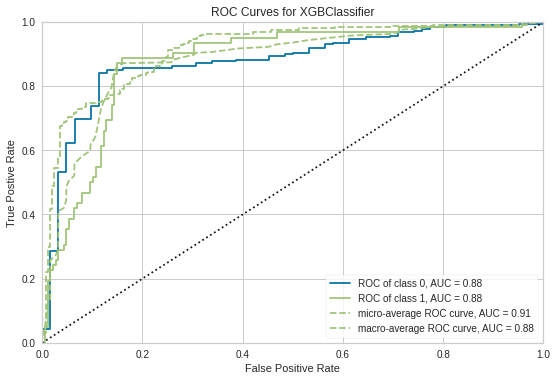

In [243]:
plot_model(model)

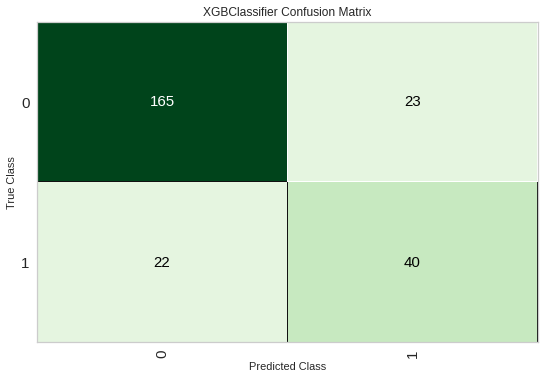

In [244]:
plot_model(model, 'confusion_matrix')

In [245]:
finalize_model(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1078,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [246]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.82,0.8771,0.6452,0.6349,0.64,0.52,0.52


,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,...,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,collision_type,property_damage,police_report_available,months_as_customer,age,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,vehicle_age,policy_annual_premium,fraud_reported,Label,Score
0,-0.670280,1.356801,1.076953,-0.372763,-0.436436,-0.438058,-0.410152,-0.408486,2.645751,-0.272239,-0.28269,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,3.590110,-0.187608,-0.224544,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,-0.206768,-0.229416,...,-0.14646,-0.160128,-0.149983,-0.142857,-0.190445,5.500000,-0.123404,-0.193247,-0.142857,-0.175863,-0.156813,-0.196014,-0.184733,-0.178862,-0.211972,-0.110208,-0.149983,-0.142857,-0.156813,-0.153432,-0.209383,-0.153432,-0.127515,-0.952602,-0.657773,1.478078,1.199820,1.100297,-0.479476,1.363112,0.462573,-0.823865,1.229693,-1.338700,0.907146,-0.149180,1.911710,0,0,0.0782
1,-0.670280,-0.737028,1.076953,2.682671,-0.436436,-0.438058,-0.410152,-0.408486,-0.377964,3.673248,-0.28269,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,-0.278543,-0.187608,-0.224544,4.105745,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,-0.206768,-0.229416,...,-0.14646,-0.160128,-0.149983,-0.142857,5.250850,-0.181818,-0.123404,-0.193247,-0.142857,-0.175863,-0.156813,-0.196014,-0.184733,-0.178862,-0.211972,-0.110208,-0.149983,-0.142857,-0.156813,-0.153432,-0.209383,-0.153432,-0.127515,1.477505,-0.657773,-0.676554,0.434972,0.115152,1.697980,-0.901927,-1.694775,-0.823865,1.229693,0.461838,0.026453,-0.648112,0.551061,0,0,0.0691
2,1.491914,-0.737028,1.076953,2.682671,-0.436436,-0.438058,-0.410152,-0.408486,-0.377964,3.673248,-0.28269,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,-0.278543,-0.187608,-0.224544,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,4.067414,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,-0.206768,-0.229416,...,-0.14646,-0.160128,-0.149983,-0.142857,-0.190445,-0.181818,-0.123404,-0.193247,-0.142857,-0.175863,-0.156813,-0.196014,-0.184733,-0.178862,-0.211972,-0.110208,-0.149983,-0.142857,-0.156813,-0.153432,-0.209383,-0.153432,-0.127515,-0.952602,-0.657773,-0.676554,2.060273,1.757

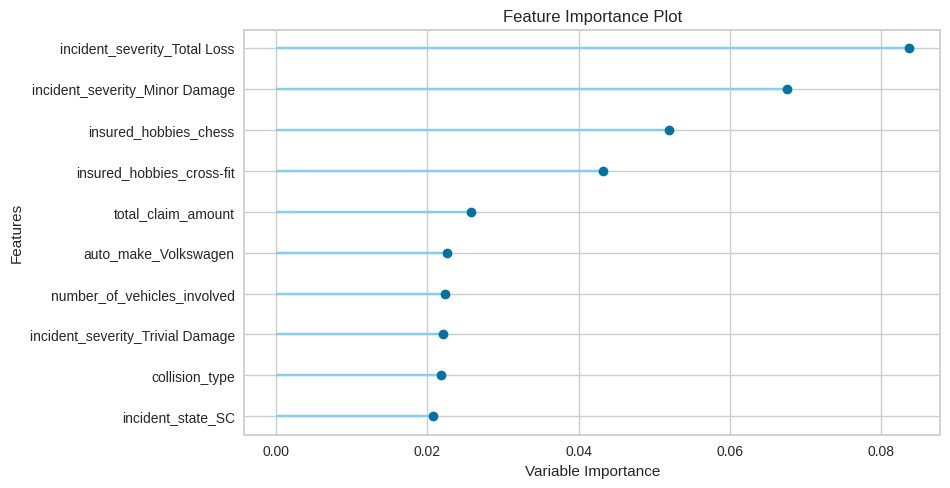

In [247]:
plot_model(model, plot='feature')